In [100]:
import os

import requests as r
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import datetime
import seaborn as sns

In [19]:
username = 'Ansuel'
repo_url = f"https://api.github.com/"
token = os.getenv("git_hub_project")

In [20]:
def get_function(repo_url):
    response = r.request(
        url=repo_url, 
        method="GET", 
        headers={
            'Authorization': token,
            # 'page_limit': '100'
        })
    html = response.json()
    if html is not None:
        return html


Evaluation metric
- users/{username}
    - bio
    - location
    - email
    - blog
    - twitter_username
    - company
    - hireable
- users/{username}/repos
    - name
    - description
    - stargazers_count
    - fork_count
    - language
    - updated_at
    - Metrics: 
* Number of public repos
* Repos with descriptions (description not null)
* Number of repos updated in last 6 months
* Average stars/forks per repo
* Diversity of languages used

In [4]:
# User profile
def get_user_metadata(username):
    url = repo_url + "users/" + username
    metadata_list = ['bio', 'location', 'email', 'blog', 'twitter_username', 'company', 'hireable']
    data = get_function(url)
    profile_result = {}
    for metadata in metadata_list:
        profile_result[metadata] = 1 if data[metadata] != '' else 0
    return profile_result
    

get_user_metadata('Ansuel')

{'bio': 1,
 'location': 1,
 'email': 1,
 'blog': 0,
 'twitter_username': 1,
 'company': 1,
 'hireable': 1}

In [5]:
def get_all_repo_metadata(username):
    url = repo_url + "users/" + username + '/repos'
    data = get_function(url)
    return data

get_all_repo_metadata('Ansuel')

[{'id': 439083290,
  'node_id': 'R_kgDOGivhGg',
  'name': '.github',
  'full_name': 'Ansuel/.github',
  'private': False,
  'owner': {'login': 'Ansuel',
   'id': 20289090,
   'node_id': 'MDQ6VXNlcjIwMjg5MDkw',
   'avatar_url': 'https://avatars.githubusercontent.com/u/20289090?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/Ansuel',
   'html_url': 'https://github.com/Ansuel',
   'followers_url': 'https://api.github.com/users/Ansuel/followers',
   'following_url': 'https://api.github.com/users/Ansuel/following{/other_user}',
   'gists_url': 'https://api.github.com/users/Ansuel/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/Ansuel/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/Ansuel/subscriptions',
   'organizations_url': 'https://api.github.com/users/Ansuel/orgs',
   'repos_url': 'https://api.github.com/users/Ansuel/repos',
   'events_url': 'https://api.github.com/users/Ansuel/events{/privacy}',
   'received_events_u

In [134]:
# Require 
def count_recently_updated_repo(data: list):
    thirty_days_ago = datetime.datetime.now(datetime.UTC) - datetime.timedelta(days=30)
    count = 0
    for repo in data:
        # Count number of date time
        if pd.to_datetime(repo, utc=True) > thirty_days_ago:
            count+=1
    return count       
            

In [131]:
def language_proficiency(language_url):
    language_dict = {}
    languages = get_function(language_url)
    for language in languages:
        if language not in language_dict:
            language_dict[language] = languages[language]
        else:
            language_dict[language] += languages[language]
    if len(language_dict) == 0:
        return None
    # sorted_languages = sorted(language_dict.items())
    # top_5_languages = list(sorted_languages.keys())[:5]
    # return top_5_languages, sorted_languages
    
    return language_dict

In [24]:
repo_data = get_all_repo_metadata("EddieNguyen2012")

In [138]:
def get_top_5_language(language_series: pd.Series):
    all = language_series.sum().sort_values(ascending=False)
    return all[:5].index.tolist()

def plot_language_time_series(values, keys, username):
    language_data_plot = pd.DataFrame(values, index=keys)
    language_data_plot = np.log(language_data_plot)
    top_5 = get_top_5_language(language_data_plot)
    language_data_plot = pd.DataFrame(language_data_plot, columns=top_5, index=keys)
    fig = plt.figure(figsize=(10,5))
    sns.lineplot(data=language_data_plot, legend=False, dashes=False)
    sns.scatterplot(
        data=language_data_plot,
    )
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Top 5 Languages')
    plt.title(f"Top 5 Languages over time of {username}")
    plt.tight_layout()
    return fig

def get_repo_metadata(username):
    repo_data = get_all_repo_metadata(username)
    df = pd.DataFrame(repo_data, columns=['name', 'description', 'branches_url', 'languages_url', 'stargazers_count', 'watchers_count', 'forks', 'created_at', 'updated_at'])
    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.set_index("created_at")
    df['language'] = df['languages_url'].apply(language_proficiency)
    
    values = df['language'].dropna().tolist()
    keys = df['language'].dropna().index.tolist()
    top_5_plot = plot_language_time_series(values, keys, username)
    top_5_plot.show()
    
    recently_updated_count = count_recently_updated_repo(df['updated_at'].tolist())

/tmp/ipykernel_8475/2569047709.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  top_5_plot.show()


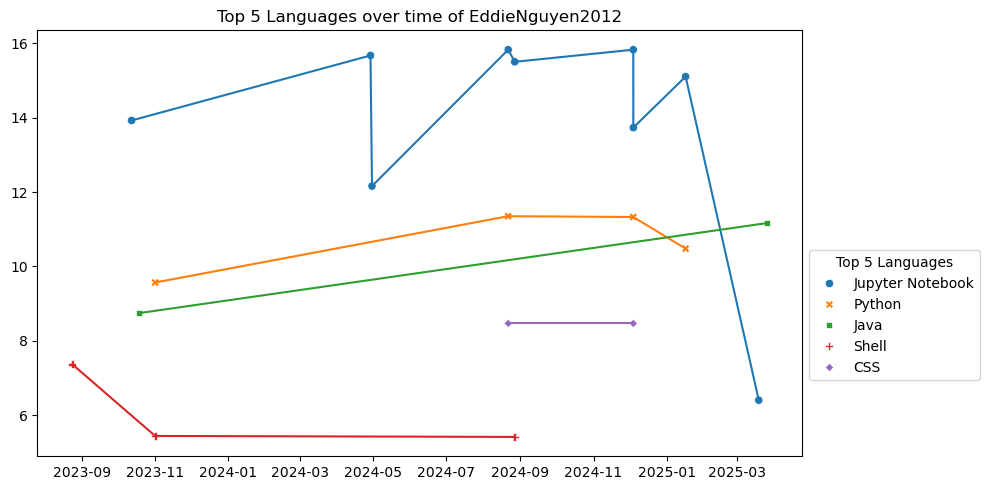

In [139]:
get_repo_metadata('EddieNguyen2012')

In [1]:
import github_explorer_analysis_module as analysis

data = analysis.get_repo_analysis_data('EddieNguyen2012')

In [2]:
data

{'index': ['2024-12-04T04:19:07Z',
  '2023-10-18T20:21:07Z',
  '2025-03-18T22:39:53Z',
  '2023-08-23T19:12:39Z',
  '2024-08-21T18:11:40Z',
  '2024-08-27T04:50:47Z',
  '2024-04-28T19:09:44Z',
  '2025-01-16T20:46:52Z',
  '2025-03-26T03:38:50Z',
  '2023-10-12T07:37:11Z',
  '2024-12-04T04:50:09Z',
  '2023-11-01T00:24:47Z',
  '2024-04-30T01:10:10Z'],
 'Jupyter Notebook': [15.828520454343924,
  nan,
  6.403574197934815,
  nan,
  15.828520454343924,
  15.502417345527952,
  15.6731740218964,
  15.106015124282953,
  nan,
  13.924688677291334,
  13.732915596059037,
  nan,
  12.160635852521567],
 'Python': [11.32956737115734,
  nan,
  nan,
  nan,
  11.351488303091998,
  nan,
  nan,
  10.480129006333248,
  nan,
  nan,
  nan,
  9.567944883732848,
  nan],
 'Java': [nan,
  8.746398334109042,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  10.946921818036719,
  nan,
  nan,
  nan,
  nan],
 'Shell': [nan,
  nan,
  nan,
  7.370860166536716,
  nan,
  5.41610040220442,
  nan,
  nan,
  nan,
  nan,
  nan,
  5.44